In [3]:
import pandas as pd
from threading import Thread
import collections
import matplotlib.pyplot as plt

In [4]:
dataFrame = pd.read_csv("./tamrin 5.csv")

In [5]:
dataFrame.head()

,Abstract,Author Keywords
0,Internet of things (IoT) has brought a greater...,Covid-19; ensemble deep learning; framingham f...
1,NaN,NaN
2,United States; Rodríguez,A.
3,Green bonds are powerful tools for fighting ag...,Gradient boosting decision tree; Green bonds; ...
4,Background: Artificial intelligence-based dise...,artificial intelligence; COVID-19; disease pre...


In [6]:
def author_keywords():
    author_keywords_counts = dict()
    for key, part in enumerate(dataFrame["Author Keywords"]):
        try:
            keywords = part.split(";")
            for word in keywords:
                word = word.lower()
                if word[0] == " ":
                    word = word[1:]
                if word in author_keywords_counts:
                    author_keywords_counts[word] += 1
                else:
                    author_keywords_counts[word] = 1
        except:
            continue
    return dict(sorted(author_keywords_counts.items(), key=lambda kv: kv[1], reverse=True))



In [7]:
# sorted_words = sorted(author_keywords().items(), key=lambda kv: kv[1], reverse=True)
# print(dict(sorted_words))
author_keywords()

{'covid-19': 75,
 'deep learning': 34,
 'machine learning': 29,
 'ensemble learning': 21,
 'transfer learning': 14,
 'artificial intelligence': 11,
 'convolutional neural network': 10,
 'forecasting': 9,
 'ensemble model': 8,
 'prediction': 7,
 'ensemble': 7,
 'sentiment analysis': 6,
 'twitter': 4,
 'coronavirus': 4,
 'arima': 4,
 'ensemble deep learning': 3,
 'support vector machine': 3,
 'neural networks': 3,
 'natural language processing': 3,
 'social media': 3,
 'covid-19 detection': 3,
 'lstm': 3,
 'pneumonia': 3,
 'stacking': 3,
 'x-ray images': 3,
 'classification': 3,
 'sars-cov-2': 3,
 'decision support': 3,
 'internet of things': 2,
 'mortality': 2,
 'health emergency': 2,
 'roberta': 2,
 'covid19': 2,
 'convolutional neural networks': 2,
 'demand forecasting': 2,
 'facebook': 2,
 'infodemiology': 2,
 'public health': 2,
 'healthcare': 2,
 'air pollution': 2,
 'random forest': 2,
 'sustainability': 2,
 'anomaly detection': 2,
 'time-series': 2,
 'diagnostic model': 2,
 'naiv

In [8]:
keywordsDataFrame = pd.DataFrame(author_keywords().items(), columns=['keywords', 'count'])
keywordsDataFrame.head()

,keywords,count
0,covid-19,75
1,deep learning,34
2,machine learning,29
3,ensemble learning,21
4,transfer learning,14


In [9]:
keywordsDataFrame

,keywords,count
0,covid-19,75
1,deep learning,34
2,machine learning,29
3,ensemble learning,21
4,transfer learning,14
...,...,...
443,artificial neural network,1
444,decision-making,1
445,routine blood tests,1
446,misinformation,1


In [10]:
def words_in_keywords(reverse=True):
    words_count = dict()
    for index, row in keywordsDataFrame.iterrows():
        try:
            words = row["keywords"].split()
            for word in words:
                if word in words_count:
                    words_count[word] += 1
                else:
                    words_count[word] = row["count"]
        except:
            continue
    return dict(sorted(words_count.items(), key=lambda kv: kv[1], reverse=reverse))

In [11]:
words_in_keywords()

{'covid-19': 91,
 'learning': 57,
 'ensemble': 51,
 'deep': 43,
 'machine': 37,
 'model': 25,
 'prediction': 19,
 'neural': 18,
 'artificial': 16,
 'intelligence': 16,
 'network': 16,
 'forecasting': 16,
 'transfer': 15,
 'analysis': 15,
 'convolutional': 11,
 'detection': 10,
 'classification': 10,
 'decision': 10,
 'support': 9,
 'networks': 9,
 'x-ray': 9,
 'sentiment': 8,
 'pneumonia': 8,
 'images': 8,
 'data': 8,
 'coronavirus': 7,
 'chest': 7,
 'feature': 7,
 'disease': 7,
 'and': 7,
 'health': 6,
 'forest': 6,
 'models': 6,
 'twitter': 5,
 'arima': 5,
 'vector': 5,
 'of': 5,
 'random': 5,
 'voting': 5,
 'algorithm': 5,
 'diagnosis': 5,
 'language': 4,
 'social': 4,
 'sars-cov-2': 4,
 'demand': 4,
 'diagnostic': 4,
 'pandemic': 4,
 'management': 4,
 'time': 4,
 'computed': 4,
 'tomography': 4,
 'ct': 4,
 'classifier': 4,
 'weighted': 4,
 'automated': 4,
 'natural': 3,
 'processing': 3,
 'media': 3,
 'lstm': 3,
 'stacking': 3,
 'internet': 3,
 'mortality': 3,
 'emergency': 3,
 'pu

In [12]:
words_of_keywordsDataFrame = pd.DataFrame(words_in_keywords().items(), columns=['words', 'count'])
words_of_keywordsDataFrame.head()

,words,count
0,covid-19,91
1,learning,57
2,ensemble,51
3,deep,43
4,machine,37


In [13]:
words_of_keywordsDataFrame

,words,count
0,covid-19,91
1,learning,57
2,ensemble,51
3,deep,43
4,machine,37
...,...,...
533,decision-making,1
534,routine,1
535,misinformation,1
536,iterative,1


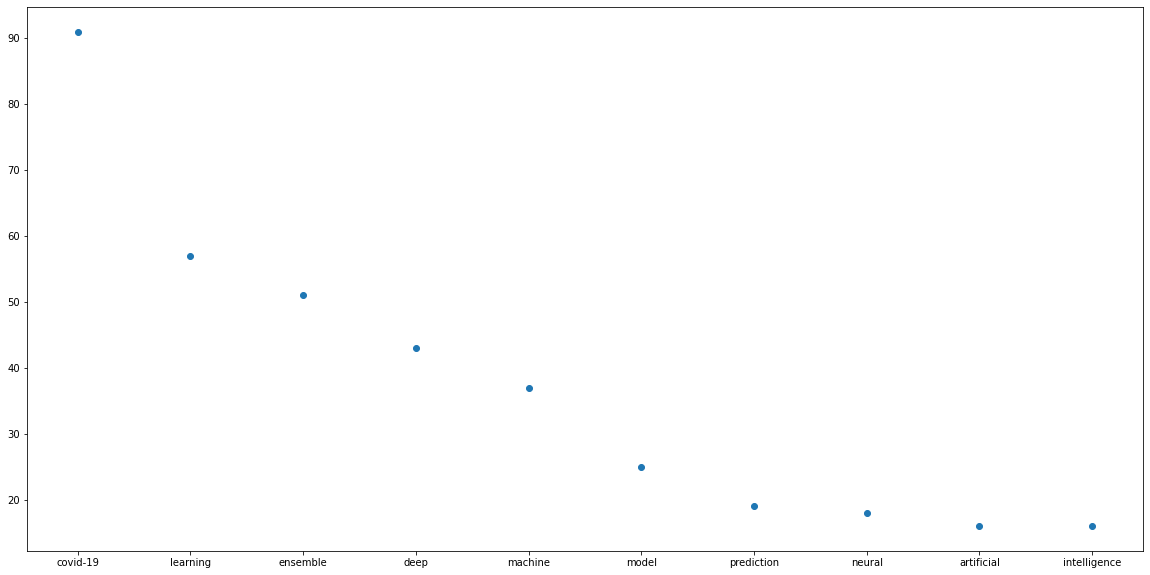

In [14]:
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(10)
plt.scatter(words_of_keywordsDataFrame["words"].head(10), words_of_keywordsDataFrame["count"].head(10))
plt.show()

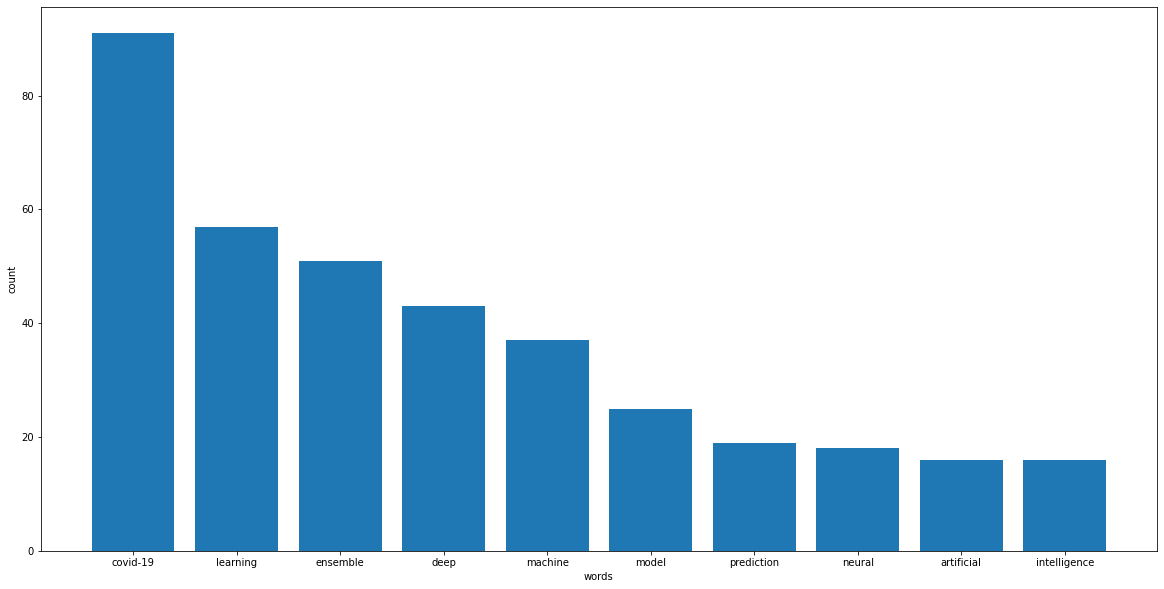

In [15]:
words_of_keywordsDataFrame = pd.DataFrame(words_in_keywords().items(), columns=['words', 'count'])
x=words_of_keywordsDataFrame["words"].head(10)
y=words_of_keywordsDataFrame["count"].head(10)
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(10)
plt.bar(x, y)
plt.xlabel('words')
plt.ylabel('count')
plt.show()